# Project: 12-2023 Instacart Basket Analysis
## Author: Nadia Ordonez
## Step 8 IC Customer profiling questions

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Customer profile questions](#2.-Customer-profile-questions)
* [3. Importing data](#3.-Importing-data)
    * [3.1 Importing libraries](#3.1-Importing-libraries)
    * [3.2 Importing data](#3.2-Importing-data)
* [4. Distribution of profiles](#4.-Distribution-of-profiles)
* [5. Ordering habits](#5.-Ordering-habits)
* [6. Regions and departments](#6.-Regions-and-departments)
* [7. Recommendations](#7.-Recommendations)

# 1. Introduction

* The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. After discussions with the Instacart team, it was agreed to create customer profiles based on age, income, and number of dependents. Number of dependents refers to the number of children per user. In Step 7 IC Customer profiling the following variables were created:  
    * "age_profile" with labels "Young adult", "Adult" and "Retired".
    * "dependents_profile" with labels "No kids" and "With kids".
    * "income_profile" with labels "Low income", "Middle income" and "High income". 
* The above classification was combined to generate 18 different customer profiles, ranging from "Young adult, No kids, Low income" to "Retired, Kids, High income" under the "customer_profile" variable. Here, visual will be generated to answer research questions requested by Instacart regarding customer profiles. 
* NOTE: After deliverations with stakeholders, it was also agreed to evaluate the frequency of customer profiles taking into account the volumen of orders per user, instead of single orders per user. In our current dataframe, a single user_id is repeated several times in the "user_id" variable depending on how many products were purchased within single orders. 

# 2. Customer profile questions

What is the distribution of customer profiles?

Is there a difference in ordering habits among customer profiles?

Is there a link between customer profiles and regions or departments?

# 3. Importing data

## 3.1 Importing libraries

In [1]:
#Import analytical libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 3.2 Importing data

In [3]:
#Project folder path into a string to easily retrieve data
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'

### Customer profiles

In [4]:
#Import “orders_products_cust_step7.pkl”
#See "Step 7 IC Customer profiling" to check for customer profiles details
cust_profiling = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_cust_step7.pkl'))

In [5]:
#Check df size
cust_profiling.shape

(30992966, 19)

In [6]:
#Check headers
cust_profiling.head()

,order_id,user_id,days_since_prior_order,department_id,prices,age,number_of_dependants,income,region,age_profile,dependents_profile,income_profile,customer_profile,mean_price_per_customer_profile,max_price_per_customer_profile,min_price_per_customer_profile,mean_usage_per_customer_profile,max_usage_per_customer_profile,min_usage_per_customer_profile
0,2539329,1,NaN,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
1,2398795,1,15.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
2,473747,1,21.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
3,2254736,1,29.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0
4,431534,1,28.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.116217,25.0,1.0,11.045855,30.0,0.0


In [7]:
#See headers
cust_profiling.dtypes

order_id                             int32
user_id                              int32
days_since_prior_order             float64
department_id                         int8
prices                             float64
age                                  int32
number_of_dependants                 int32
income                               int64
region                              object
age_profile                         object
dependents_profile                  object
income_profile                      object
customer_profile                    object
mean_price_per_customer_profile    float64
max_price_per_customer_profile     float64
min_price_per_customer_profile     float64
mean_usage_per_customer_profile    float64
max_usage_per_customer_profile     float64
min_usage_per_customer_profile     float64
dtype: object

In [8]:
#Create a subset to avoid RAM issues
#Selecting columns to avoid RAM memory issues
variables = ['order_id', 'user_id', 'days_since_prior_order', 'department_id', 'prices', 'region', 'customer_profile']
cust_profiling = cust_profiling.loc[:, variables]

In [9]:
#Check df size
cust_profiling.shape

(30992966, 7)

In [10]:
#Check headers
cust_profiling.head()

,order_id,user_id,days_since_prior_order,department_id,prices,region,customer_profile
0,2539329,1,NaN,7,9.0,South,Adult_With kids_Low income
1,2398795,1,15.0,7,9.0,South,Adult_With kids_Low income
2,473747,1,21.0,7,9.0,South,Adult_With kids_Low income
3,2254736,1,29.0,7,9.0,South,Adult_With kids_Low income
4,431534,1,28.0,7,9.0,South,Adult_With kids_Low income


# 4. Distribution of profiles

What is the distribution of customer profiles? Which customer profile is the most predominant in our dataframe?

In [11]:
#Frequency of customer profiles
distribution = cust_profiling['customer_profile'].value_counts(dropna=False)

In [12]:
#See results
distribution

customer_profile
Adult_With kids_Middle income          11328954
Retired_With kids_Middle income         5442930
Adult_No kids_Middle income             3812244
Adult_With kids_Low income              2740559
Young adult_With kids_Middle income     1980497
Retired_No kids_Middle income           1796557
Adult_No kids_Low income                 926872
Young adult_With kids_Low income         926080
Retired_With kids_Low income             694263
Young adult_No kids_Middle income        643316
Young adult_No kids_Low income           307579
Retired_No kids_Low income               213220
Adult_With kids_High income               83414
Retired_With kids_High income             41653
Adult_No kids_High income                 29951
Retired_No kids_High income               14143
Young adult_With kids_High income          7525
Young adult_No kids_High income            3209
Name: count, dtype: int64

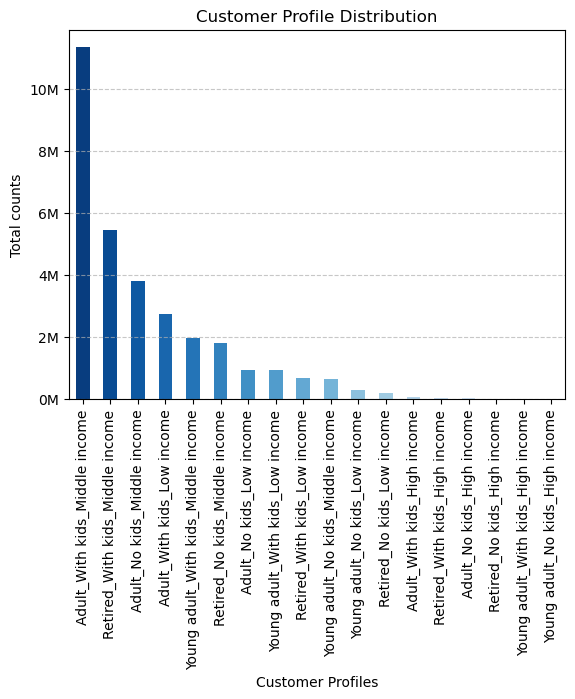

In [13]:
#Plotting frequency with a bar chart
#Reverse the 'Blues' colormap
colors = sns.color_palette("Blues", len(distribution))
colors = list(reversed(colors))

ax = distribution.plot.bar(color=colors)

#Adding main title
plt.title("Customer Profile Distribution")

#Adding x-axis label
plt.xlabel("Customer Profiles")

#Adding y-axis label
plt.ylabel("Total counts")

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_customer_profile_distribution.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show the plot
plt.show()

The top three most prevalent customer profiles in our database share a common characteristic—middle income. These profiles include adults, both with and without children, as well as retirees with kids. Notably, the "Adult with kids and middle income" profile stands out with an impressive frequency, exceeding 10 million occurrences.

# 5. Ordering habits

Is there a difference in ordering habits among customer profiles?

## Expenditure

Which customer profiles spent the most in our Instacart app?

In [14]:
#Total sum per customer profile
total_prices_table = pd.pivot_table(cust_profiling, values='prices', index='customer_profile', aggfunc='sum').reset_index()

#Sort in descending order
total_prices_table = total_prices_table.sort_values(by='prices', ascending=False)

#Display the sorted table without showing the index
total_prices_table.style.set_table_styles([{'selector': 'thead', 'props': [('display', 'none')]}])

,customer_profile,prices
5,Adult_With kids_Middle income,90148849.300000
11,Retired_With kids_Middle income,43343749.300000
2,Adult_No kids_Middle income,30336012.400000
4,Adult_With kids_Low income,19502405.700000
17,Young adult_With kids_Middle income,15754190.600000
8,Retired_No kids_Middle income,14301614.500000
16,Young adult_With kids_Low income,6898146.200000
1,Adult_No kids_Low income,6590383.900000
14,Young adult_No kids_Middle income,5116983.600000
10,Retired_With kids_Low income,4520494.500000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


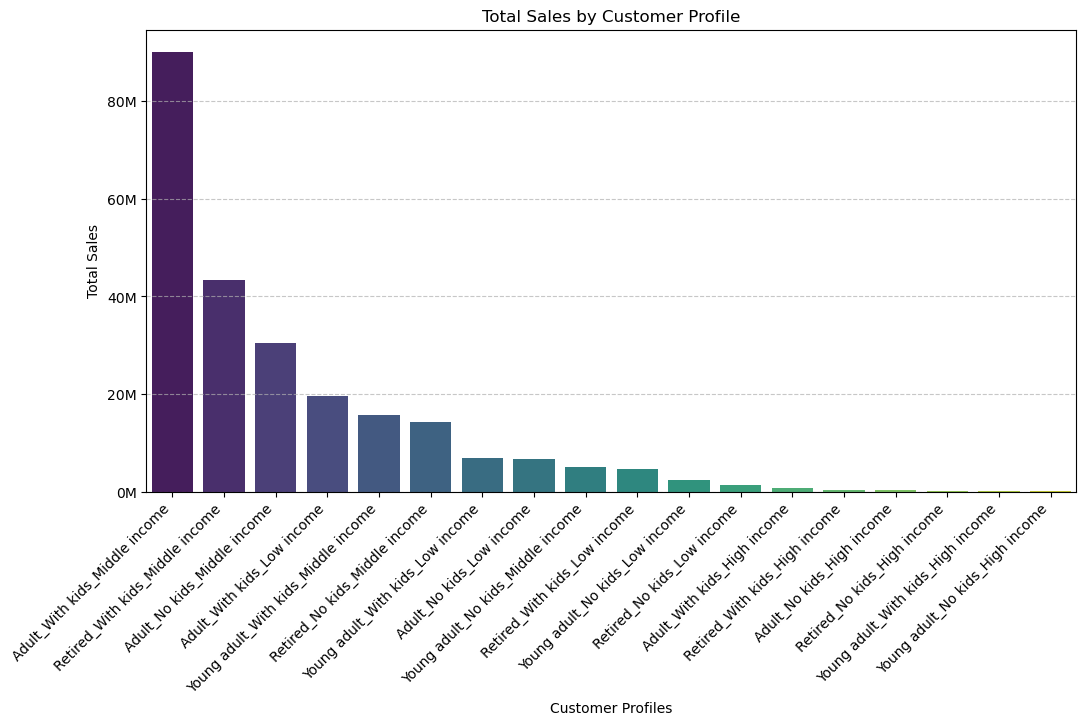

In [41]:
#Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_profile', y='prices', data=total_prices_table, palette='viridis', order=total_prices_table.sort_values('prices', ascending=False)['customer_profile'])
plt.title("Total Sales by Customer Profile")
plt.xlabel("Customer Profiles")
plt.ylabel("Total Sales")

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_customer_profile_total_price.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

The significance of our top three identified customer profiles extends beyond their frequency; they also contribute substantially to our sales figures. Collectively, these profiles represent a substantial share, contributing to sales exceeding 163 million.

## Usage frequency

Which customer profiles use our Instacart app more frequently?

In [16]:
#Average "days_since_prior_order" per customer profile 
usage_table = pd.pivot_table(cust_profiling, values='days_since_prior_order', index='customer_profile', aggfunc='mean').reset_index()

#Sort in descending order
usage_table = usage_table.sort_values(by='days_since_prior_order')

#Display the sorted table without showing the index
usage_table.style.set_table_styles([{'selector': 'thead', 'props': [('display', 'none')]}])

,customer_profile,days_since_prior_order
0,Adult_No kids_High income,9.552416
6,Retired_No kids_High income,9.633782
15,Young adult_With kids_High income,9.690810
9,Retired_With kids_High income,10.280375
3,Adult_With kids_High income,10.363265
17,Young adult_With kids_Middle income,10.649799
8,Retired_No kids_Middle income,10.703718
2,Adult_No kids_Middle income,10.717566
11,Retired_With kids_Middle income,10.768141
5,Adult_With kids_Middle income,10.791625


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


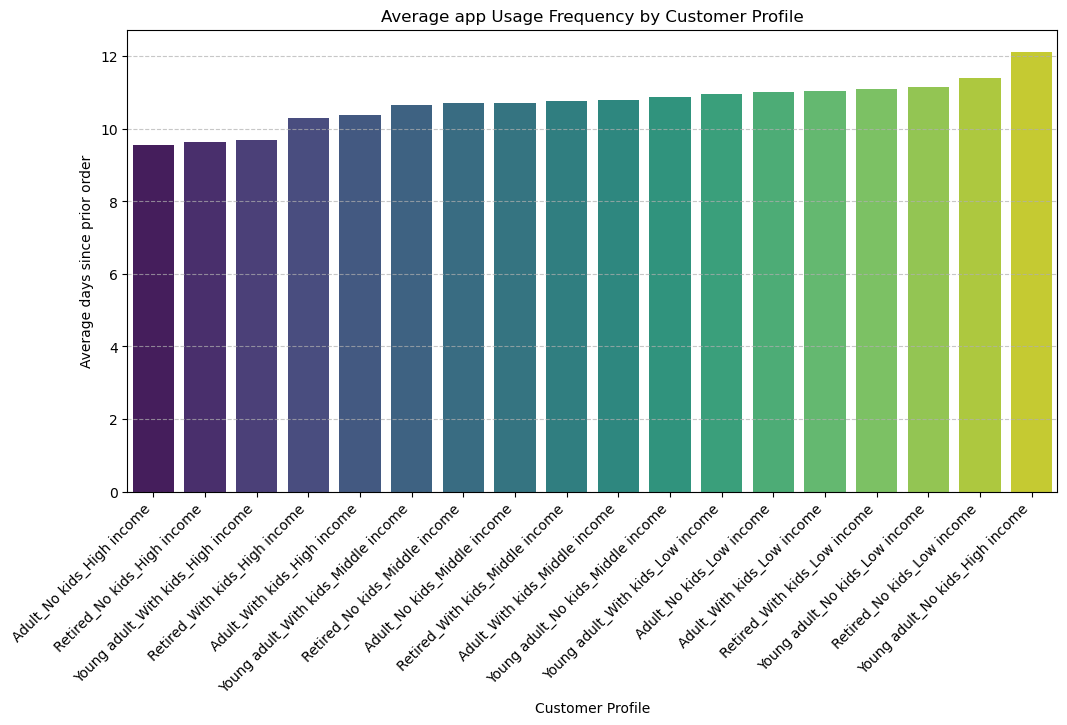

In [17]:
#Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_profile', y='days_since_prior_order', data=usage_table, palette='viridis', order=usage_table.sort_values('days_since_prior_order')['customer_profile'])
plt.title("Average app Usage Frequency by Customer Profile")
plt.xlabel("Customer Profile")
plt.ylabel("Average days since prior order")

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_customer_profile_app_usage_frequency.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Regarding usage frequency averages, an interesting trend emerges. Customer profiles with higher incomes exhibit a more frequent ordering pattern, with an average order placement interval of approximately 9 days. In contrast, our top three previously identified customer profiles, distinguished by both frequency and sales, tend to place orders at a slightly lower frequency, averaging around 11 days.

# 6. Regions and departments

Is there a link between customer profiles and regions or departments?

## Regions

Which customer profiles are more popular in each our our regions?

In [18]:
#Group by 'region' and 'customer_profile' and count occurrences
region_profile_counts = cust_profiling.groupby(['region', 'customer_profile']).size().reset_index(name='profile_count')

#Sort profiles within each region by count in descending order
sorted_profiles = region_profile_counts.sort_values(by=['region', 'profile_count'], ascending=[True, False])

#Print or display the result
sorted_profiles

,region,customer_profile,profile_count
5,Midwest,Adult_With kids_Middle income,2874571
11,Midwest,Retired_With kids_Middle income,1376075
2,Midwest,Adult_No kids_Middle income,997361
4,Midwest,Adult_With kids_Low income,689584
17,Midwest,Young adult_With kids_Middle income,502812
...,...,...,...
63,West,Retired_With kids_High income,9182
54,West,Adult_No kids_High income,5903
60,West,Retired_No kids_High income,2462
69,West,Young adult_With kids_High income,2195


In [19]:
#Filter the top 3 profiles per region
top_profiles_per_region = sorted_profiles.groupby('region').head(3)
top_profiles_per_region

,region,customer_profile,profile_count
5,Midwest,Adult_With kids_Middle income,2874571
11,Midwest,Retired_With kids_Middle income,1376075
2,Midwest,Adult_No kids_Middle income,997361
23,Northeast,Adult_With kids_Middle income,2002555
29,Northeast,Retired_With kids_Middle income,977659
20,Northeast,Adult_No kids_Middle income,637148
41,South,Adult_With kids_Middle income,3531677
47,South,Retired_With kids_Middle income,1695436
38,South,Adult_No kids_Middle income,1183975
59,West,Adult_With kids_Middle income,2920151


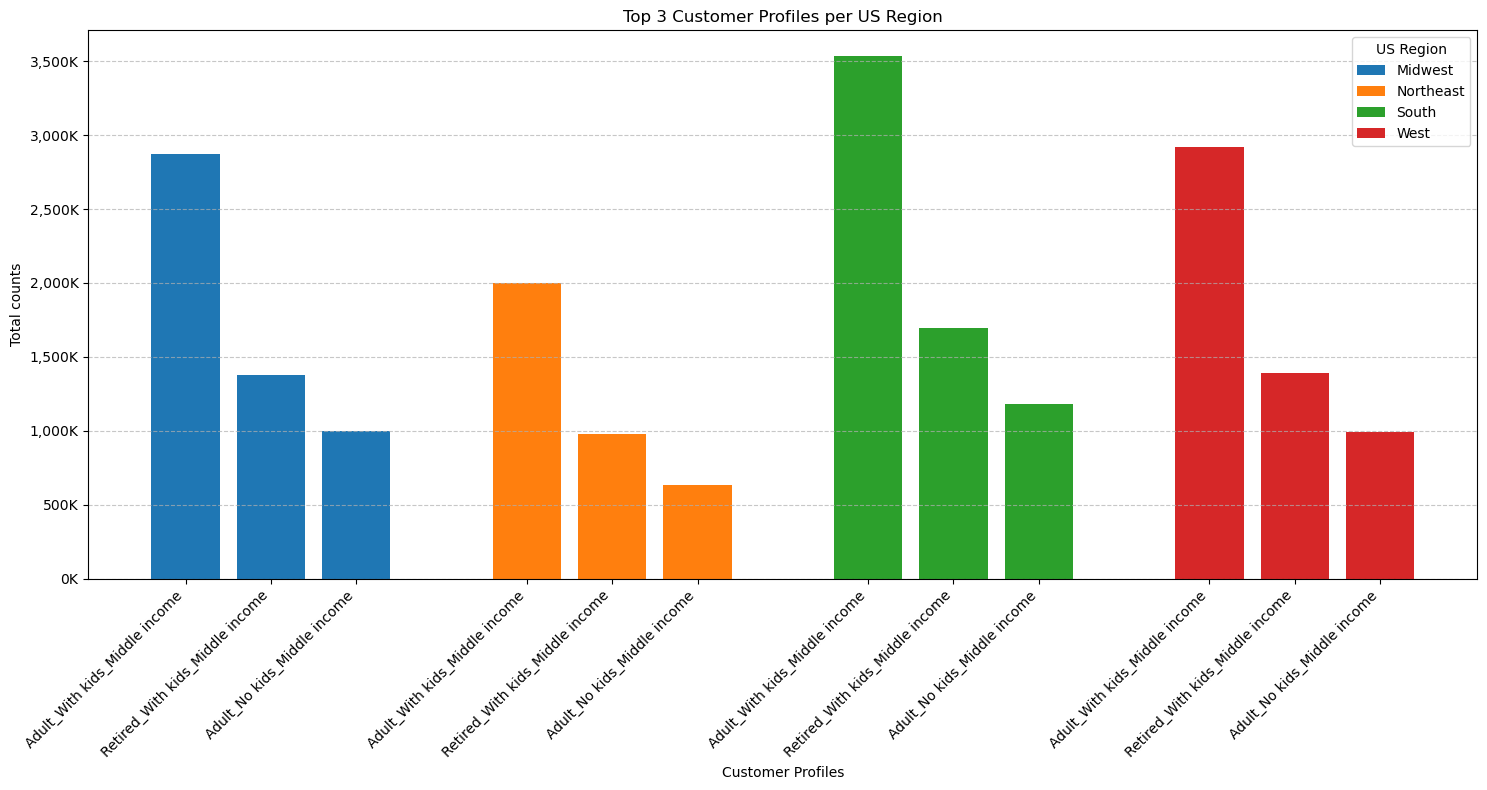

In [20]:
#Set up the plot
fig, ax = plt.subplots(figsize=(15, 8))

#Initialize variables to store tick positions and labels
tick_positions = []
tick_labels = []

#Iterate through unique regions
for i, region in enumerate(sorted_profiles['region'].unique()):
    #Select data for the current region
    region_data = sorted_profiles[sorted_profiles['region'] == region].head(3)

    #Plot the data for the current region
    plt.bar(np.arange(len(region_data)) + i * 4, region_data['profile_count'], label=region)

    #Append tick positions and labels
    tick_positions.extend(np.arange(len(region_data)) + i * 4)
    tick_labels.extend(region_data['customer_profile'].tolist())

#Customize the plot
plt.title("Top 3 Customer Profiles per US Region")
plt.xlabel("Customer Profiles")
plt.ylabel("Total counts")
plt.legend(title='US Region')
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.tight_layout()

# Changing y-axis to display values in thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_customer_profiles_regions.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show the plot
plt.show()

Here, our previously identified top three customer profiles, based on both frequency and sales, continue to stand out as the most common across all four US regions. The graph further reveals that the Southern states, followed by the Western and Midwestern states, exhibit a significant concentration of customer profiles.

## Departments

What are the preferred grocery departments where our top 3 customer profiles spent most of their money?

In [21]:
#Create a subset to avoid RAM issues
#Selecting columns to avoid RAM memory issues
variables = ['order_id', 'user_id', 'department_id', 'prices', 'customer_profile']
cust_departments = cust_profiling.loc[:, variables]

In [22]:
#See results
cust_departments.shape

(30992966, 5)

In [23]:
#See results
cust_departments.head()

,order_id,user_id,department_id,prices,customer_profile
0,2539329,1,7,9.0,Adult_With kids_Low income
1,2398795,1,7,9.0,Adult_With kids_Low income
2,473747,1,7,9.0,Adult_With kids_Low income
3,2254736,1,7,9.0,Adult_With kids_Low income
4,431534,1,7,9.0,Adult_With kids_Low income


In [24]:
#See results
cust_departments.dtypes

order_id              int32
user_id               int32
department_id          int8
prices              float64
customer_profile     object
dtype: object

### Adding department names

In [25]:
#Creating a variable containing the department names
#Creating a dictionary
#NOTE: Dictionary provided by Instacart team
department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [26]:
#See dictionary
department_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [27]:
#Convert 'department_id' to string to match the keys in the dictionary
cust_departments['department_id'] = cust_departments['department_id'].astype(str)

In [28]:
#Map 'department_id' to 'department_name' using the dictionary
cust_departments['department_name'] = cust_departments['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [29]:
#See results
cust_departments.head()
#"department_name" was added

,order_id,user_id,department_id,prices,customer_profile,department_name
0,2539329,1,7,9.0,Adult_With kids_Low income,beverages
1,2398795,1,7,9.0,Adult_With kids_Low income,beverages
2,473747,1,7,9.0,Adult_With kids_Low income,beverages
3,2254736,1,7,9.0,Adult_With kids_Low income,beverages
4,431534,1,7,9.0,Adult_With kids_Low income,beverages


In [30]:
#Counting values within new column
cust_departments['department_name'].value_counts(dropna = False)
#The top 3 favourite grocery departments are produce, dairy eggs, and snacks 

department_name
produce            9079276
dairy eggs         5191364
snacks             2766406
beverages          2573822
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           677073
meat seafood        674785
personal care       424362
babies              410392
international       255991
alcohol             144627
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [31]:
#Check flags
cust_departments.groupby('department_name').agg({'department_id' : ['min', 'max']})
#nothing odd on the results
#department_name was correctly assigned to the df

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

### Top customer profiles and grocery departments 

In [32]:
#See unique values within a variable
cust_departments['customer_profile'].unique()

array(['Adult_With kids_Low income', 'Retired_No kids_Low income',
       'Adult_With kids_Middle income', 'Retired_No kids_Middle income',
       'Retired_With kids_Middle income', 'Retired_With kids_Low income',
       'Young adult_With kids_Low income', 'Adult_No kids_Middle income',
       'Young adult_No kids_Low income', 'Adult_No kids_Low income',
       'Young adult_With kids_Middle income',
       'Young adult_No kids_Middle income', 'Adult_With kids_High income',
       'Retired_With kids_High income',
       'Young adult_With kids_High income', 'Adult_No kids_High income',
       'Young adult_No kids_High income', 'Retired_No kids_High income'],
      dtype=object)

In [33]:
#Filter df to select the top 3 customer profiles see sections 4. Distribution of profiles and 5. Ordering habits  
selected_profiles = ['Adult_With kids_Middle income', 'Retired_With kids_Middle income', 'Adult_No kids_Middle income']
filtered_df = cust_departments[cust_departments['customer_profile'].isin(selected_profiles)]

In [34]:
#See results
filtered_df.head()

,order_id,user_id,department_id,prices,customer_profile,department_name
131,2293453,19,7,9.0,Adult_With kids_Middle income,beverages
132,1973799,19,7,9.0,Adult_With kids_Middle income,beverages
133,532817,19,7,9.0,Adult_With kids_Middle income,beverages
134,2474845,19,19,1.6,Adult_With kids_Middle income,snacks
135,86918,19,4,8.8,Adult_With kids_Middle income,produce


In [35]:
#See results
filtered_df.shape
#Nothing odd in the results

(20584128, 6)

In [36]:
#Group by customer_profile and department_name, then calculate the sum of prices
grouped_df = filtered_df.groupby(['customer_profile', 'department_name'])['prices'].sum().reset_index()

In [37]:
#See results
grouped_df

,customer_profile,department_name,prices
0,Adult_No kids_Middle income,alcohol,149206.1
1,Adult_No kids_Middle income,babies,423959.7
2,Adult_No kids_Middle income,bakery,1134957.1
3,Adult_No kids_Middle income,beverages,2366495.6
4,Adult_No kids_Middle income,breakfast,669629.9
...,...,...,...
58,Retired_With kids_Middle income,pantry,2587036.5
59,Retired_With kids_Middle income,personal care,585474.6
60,Retired_With kids_Middle income,pets,132705.9
61,Retired_With kids_Middle income,produce,13195108.6


In [38]:
#Select the top 5 departments per customer profile based on prices
top_5_per_profile = grouped_df.groupby('customer_profile', group_keys=False).apply(lambda x: x.nlargest(5, 'prices'))
top_5_per_profile

,customer_profile,department_name,prices
19,Adult_No kids_Middle income,produce,9269569.7
7,Adult_No kids_Middle income,dairy eggs,5524601.7
3,Adult_No kids_Middle income,beverages,2366495.6
10,Adult_No kids_Middle income,frozen,2057379.7
16,Adult_No kids_Middle income,pantry,1798690.0
40,Adult_With kids_Middle income,produce,27443681.6
28,Adult_With kids_Middle income,dairy eggs,16337015.0
24,Adult_With kids_Middle income,beverages,7025713.7
31,Adult_With kids_Middle income,frozen,6148734.3
37,Adult_With kids_Middle income,pantry,5389653.1


In [39]:
#Reordering customer profiles
desired_order = ['Adult_With kids_Middle income', 'Retired_With kids_Middle income', 'Adult_No kids_Middle income']

top_5_per_profile['customer_profile'] = pd.Categorical(top_5_per_profile['customer_profile'], categories=desired_order, ordered=True)
top_5_per_profile = top_5_per_profile.sort_values('customer_profile')

#See results
top_5_per_profile

,customer_profile,department_name,prices
40,Adult_With kids_Middle income,produce,27443681.6
28,Adult_With kids_Middle income,dairy eggs,16337015.0
24,Adult_With kids_Middle income,beverages,7025713.7
31,Adult_With kids_Middle income,frozen,6148734.3
37,Adult_With kids_Middle income,pantry,5389653.1
61,Retired_With kids_Middle income,produce,13195108.6
49,Retired_With kids_Middle income,dairy eggs,7857715.7
45,Retired_With kids_Middle income,beverages,3380170.3
52,Retired_With kids_Middle income,frozen,2952811.1
58,Retired_With kids_Middle income,pantry,2587036.5


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


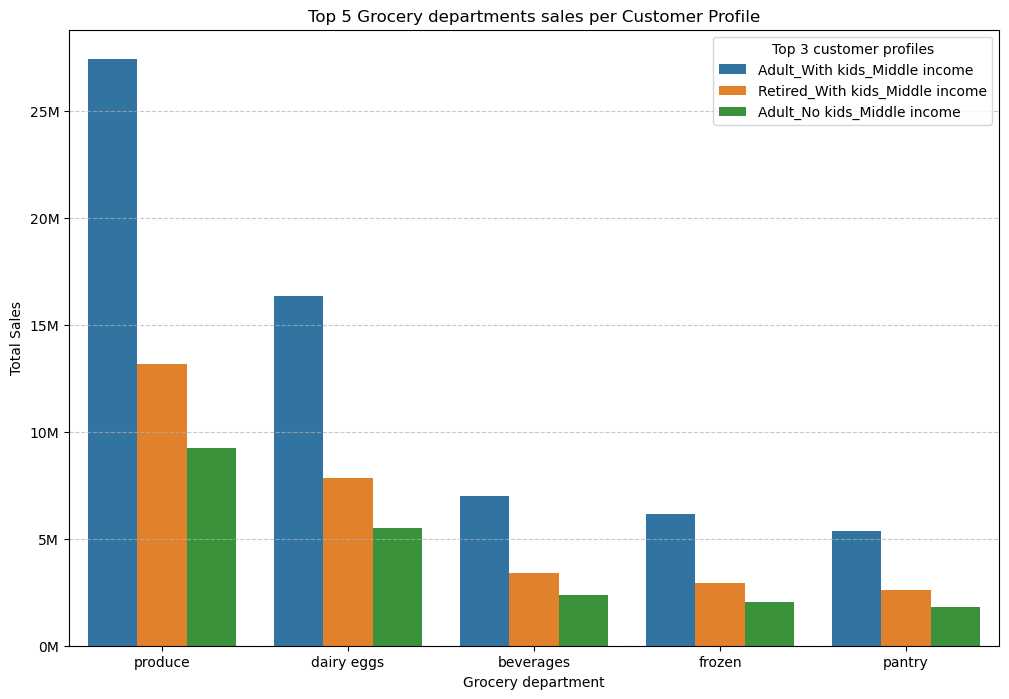

In [42]:
# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='department_name', y='prices', hue='customer_profile', data=top_5_per_profile)
plt.title('Top 5 Grocery departments sales per Customer Profile')
plt.xlabel('Grocery department')
plt.ylabel('Total Sales')

# Access the current axis (ax) after creating the plot
ax = plt.gca()

# Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Modify legend title
plt.legend(title='Top 3 customer profiles')

# Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_customer_profiles_departments.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

plt.show()

Our top three customer profiles, identified by their overall frequency, regional frequency, and total sales, exhibit similar spending habits across various grocery departments. Predominantly, they allocate their expenditures to the following grocery categories: produce, dairy-eggs, beverages, frozen, and pantry. Notably, the customer profile "Adult with kids and middle income" stands out for its substantial spending on products from the produce department.

# 7. Recommendations

In summary, our top three middle-income customer profiles, encompassing adults with and without kids, and retirees with kids, reveal the standout influence of the "Adult with kids and middle income" category, surpassing 10 million occurrences and contributing substantially to our $163 million in sales. Despite a slightly less frequent ordering pattern, these profiles exhibit prevalence nationwide, with the Southern states leading in customer counts.

In a targeted marketing campaign aimed at amplifying engagement with our key customer base, prioritizing the "Adult with kids and middle income" group is essential. Tailoring messages and promotions specifically to meet their preferences could further enhance our market share.

Examining spending habits, our top three profiles consistently allocate expenditures across key grocery departments—produce, dairy-eggs, beverages, frozen, and pantry. Particularly noteworthy is the robust spending on produce items by the "Adult with kids and middle income" profile. Therefore, a focused approach to promoting and placing products from these departments in marketing materials and the Instacart platform is advised. Special deals, discounts, or loyalty programs for produce items may prove highly effective.

In conclusion, our top three customer profiles not only shape our demographic landscape but also wield a significant influence on sales and ordering patterns, emphasizing their enduring impact on our business metrics. Leveraging our defined profiles allows for crafting personalized and targeted messaging, showcasing different aspects of Instacart's service that resonate with each group based on their unique needs and preferences.